    ** shift+j selects multiple cells.  Then shift+m merges them into one.
    ** shift+ctrl+subtract sign  will split the cells at the location of the cursor.

## SEE THE XSPEC_MCMCchain_slicing_Subjectivve_Method to see the details of each step in this program.  

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyfits
from collections import OrderedDict
%matplotlib inline

/Users/KimiZ/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('ChainPlots1.pdf') # PDF to store plots.
PDF2 = PdfPages('ChainPlots2.pdf') # PDF to store plots.

In [3]:
filename1 = "chains-1-grbm+lpow.fit"
filename2 = "chains-2-grbm+lpow.fit"
filename3 = "chains-3-grbm+lpow.fit"

In [4]:
f1 = pyfits.open(filename1)
f2 = pyfits.open(filename2)
f3 = pyfits.open(filename3)

#### MCMC chain type:

In [5]:
f1[1].header["CHAINTYP"], f2[1].header["CHAINTYP"], f3[1].header["CHAINTYP"]

('GoodmanWeare', 'GoodmanWeare', 'GoodmanWeare')

In [6]:
f1.info(), f2.info(), f3.info()

Filename: chains-1-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   10000R x 7C   [D, D, D, D, D, D, D]   
Filename: chains-2-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   5500R x 7C   [D, D, D, D, D, D, D]   
Filename: chains-3-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   5500R x 7C   [D, D, D, D, D, D, D]   


(None, None, None)

#### All had 10 Walkers.

In [7]:
f1[1].header["NWALKERS"], \
f2[1].header["NWALKERS"], \
f3[1].header["NWALKERS"]

(10, 10, 10)

#### Burn Lengths:

In [8]:
f1[1].header["COMMENT"][1].split("= "), \
f2[1].header["COMMENT"][1].split("= "), \
f3[1].header["COMMENT"][1].split("= ")

(['BURN LENGTH ', '2000'], ['BURN LENGTH ', '500'], ['BURN LENGTH ', '100'])

#### Length of each chain file (number of chains ran):

In [9]:
len(f1[1].data), len(f2[1].data), len(f3[1].data)

(10000, 5500, 5500)

### Take the chain data stored in the fits files and make pandas dataframes.

In [10]:
df_chains1 = pd.DataFrame(f1[1].data) 
df_chains2 = pd.DataFrame(f2[1].data)
df_chains3 = pd.DataFrame(f3[1].data)

In [11]:
# df_chains1[df_chains1["FIT_STATISTIC"]>400.0]

### The data format of the CHAIN.data is little-endian, because that's what Fits files store the data as.  This will cause problems for the Pandas package, as well as many others.  If some of your pandas commands don't work and you get an error that says this:
    ValueError: Big-endian buffer not supported on little-endian compiler
### Then you need to convert the data to big-endian (float64).


In [12]:
df_chains1.dtypes

alpha__1         >f8
beta__2          >f8
tem__3           >f8
norm__4          >f8
plIndex__5       >f8
norm__6          >f8
FIT_STATISTIC    >f8
dtype: object

### Converting from little-endian format (f8) to big-endian (float64). 
This will cause issues with Pandas later if you don't do this now.  Pyfits uses little-endian format where most other programs use big-endian.

In [13]:
df_chains1 = df_chains1.astype('float64')
df_chains2 = df_chains2.astype('float64')
df_chains3 = df_chains3.astype('float64')

In [14]:
df_chains1.dtypes

alpha__1         float64
beta__2          float64
tem__3           float64
norm__4          float64
plIndex__5       float64
norm__6          float64
FIT_STATISTIC    float64
dtype: object

### Now we need to sort the data by the FIT_STATISTIC column and trim down the data to a subset of N datasets with the best (lowest) statistics.  This statistic is also known as the C-stat.

\*** In order to do this, we make a copy, newchain = oldchain.copy(), instead of using newchain = oldchain.  The latter method will cause changed to the old chain file when you edit the new one. 

In [15]:
Chain1 = df_chains1.copy()
Chain2 = df_chains2.copy()
Chain3 = df_chains3.copy()

#### Now we cant to sort all the chains by the FIT_STATISTIC with smallest values first.
These are the most likely parameters (i.e., have the greated log-likelihood) since log-likelihood = cstat/-2.

In [16]:
Chain1S = Chain1.sort_values(by="FIT_STATISTIC", ascending=True)
Chain2S = Chain2.sort_values(by="FIT_STATISTIC", ascending=True)
Chain3S = Chain3.sort_values(by="FIT_STATISTIC", ascending=True)

#### You will see that we sorted the data by the Fit Statistic, ascending in value.

In [17]:
Chain1S[0:10]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
380  -0.730139 -2.178759  293.871104  0.019258   -2.043611  0.001088   
2450 -0.739288 -2.183636  300.301886  0.019166   -2.037493  0.001061   
2460 -0.739288 -2.183636  300.301886  0.019166   -2.037493  0.001061   
2470 -0.739882 -2.184326  301.041748  0.019152   -2.037684  0.001061   
2420 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
2440 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
2430 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
9568 -0.735106 -2.179753  297.695453  0.019227   -2.061632  0.001058   
9558 -0.735106 -2.179753  297.695453  0.019227   -2.061632  0.001058   
559  -0.758979 -2.176577  304.240366  0.019200   -2.053504  0.000956   

      FIT_STATISTIC  
380      307.072973  
2450     307.169801  
2460     307.169801  
2470     307.197460  
2420     307.204598  
2440     307.204598  
2430     307.204598  
9568     307.206187  
9558     307.206187  
559      307.403383

In [18]:
Chain2S[0:10]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
4074 -0.755352 -2.182698  308.964302  0.018979   -2.048486  0.001002   
4084 -0.755352 -2.182698  308.964302  0.018979   -2.048486  0.001002   
4064 -0.755352 -2.182698  308.964302  0.018979   -2.048486  0.001002   
4034 -0.757615 -2.184045  310.543633  0.018951   -2.044415  0.001005   
4024 -0.757615 -2.184045  310.543633  0.018951   -2.044415  0.001005   
4044 -0.757615 -2.184045  310.543633  0.018951   -2.044415  0.001005   
4344 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   
4364 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   
4334 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   
4354 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   

      FIT_STATISTIC  
4074     306.960875  
4084     306.960875  
4064     306.960875  
4034     306.995509  
4024     306.995509  
4044     306.995509  
4344     307.112924  
4364     307.112924  
4334     307.112924  
4354     307.112924

In [19]:
Chain3S[0:10]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
4795 -0.765098 -2.178457  313.395368  0.019044   -2.092870  0.000890   
4775 -0.765098 -2.178457  313.395368  0.019044   -2.092870  0.000890   
4785 -0.765098 -2.178457  313.395368  0.019044   -2.092870  0.000890   
4765 -0.764378 -2.178433  312.924425  0.019050   -2.091806  0.000893   
4972 -0.782745 -2.178130  323.564601  0.018946   -2.122827  0.000820   
4982 -0.782745 -2.178130  323.564601  0.018946   -2.122827  0.000820   
4805 -0.781839 -2.179007  324.341767  0.018905   -2.117610  0.000833   
4892 -0.778477 -2.180880  324.067185  0.018874   -2.105319  0.000860   
4852 -0.778477 -2.180880  324.067185  0.018874   -2.105319  0.000860   
4902 -0.778477 -2.180880  324.067185  0.018874   -2.105319  0.000860   

      FIT_STATISTIC  
4795     306.819788  
4775     306.819788  
4785     306.819788  
4765     306.833179  
4972     306.890166  
4982     306.890166  
4805     306.895570  
4892     306.916653  
4852     306.916653  
4902     306.916653

### Now we plot the chains and look at the C-stat for each chain.

In [20]:
# f1[1].header["COMMENT"]

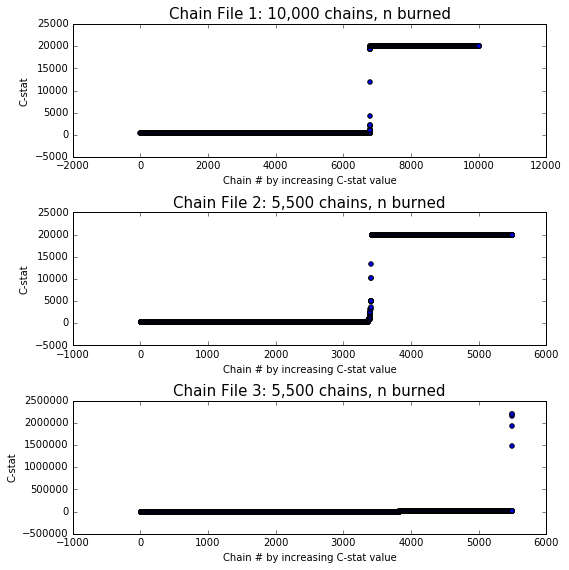

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(8,8))

Chain2Plot = Chain1S[:]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax1.scatter(x,y)
ax1.set_xlabel("Chain # by increasing C-stat value")
ax1.set_ylabel("C-stat")
ax1.set_title("Chain File 1: 10,000 chains, n burned", size=15)

Chain2Plot = Chain2S[:]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax2.scatter(x,y)
ax2.set_xlabel("Chain # by increasing C-stat value")
ax2.set_ylabel("C-stat")
ax2.set_title("Chain File 2: 5,500 chains, n burned", size=15)

Chain2Plot = Chain3S[:]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax3.scatter(x,y)
ax3.set_xlabel("Chain # by increasing C-stat value")
ax3.set_ylabel("C-stat")
ax3.set_title("Chain File 3: 5,500 chains, n burned", size=15)

fig.tight_layout()

#### At first glance of the plots, we can see that there are too many chains with too high of C-stat values, and therefore low likelihoods.  We only want the ones within reason and close to the lowest C-stat value around 300.

#### The chains with extrememly large C-stat values have very extreme parameter values as well, and therefore unrealistic errors would be calculated.  We need to cut these down to a reasonable C-stat values to get reasonable error bars.

plt.subplots(nrows, ncols) 

    subplots(nrows, ncols, sharex, sharey, squeeze, subplot_kw, gridspec_kw, **kwargs)

## Now we will plot the parameters against themselves and against the C-stat values.

## -----> Programs for plotting.

In [22]:
def plot_conditional(data, dim1, dim2, **kwargs):
    xvalue = data[data.columns[dim1]]
    yvalue = data[data.columns[dim2]]
    return plt.hexbin(x = xvalue, y = yvalue, reduce_C_function=np.nansum,**kwargs)

In [23]:
def fit_statistics(data, dim1, **kwargs):
    xvalue = data[data.columns[dim1]]
    yvalue = data.FIT_STATISTIC
    return plt.hexbin(x = xvalue, y = yvalue, reduce_C_function=np.nansum,**kwargs)

In [24]:
import astroML.density_estimation as ML

# Chain 1

In [25]:
data = Chain1S

t = data["FIT_STATISTIC"]

bins = ML.bayesian_blocks(t, fitness='events', p0=0.001)

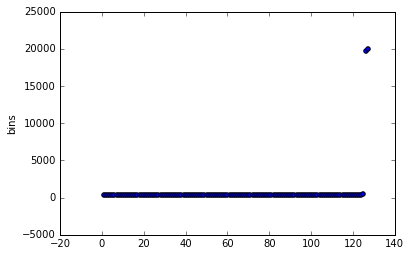

In [26]:
x = np.arange(1,len(bins)+1, 1)
y = bins
plt.scatter(x,y)
plt.ylabel("bins")

In [27]:
diff_bins = np.diff(bins)

In [28]:
max_diff_in_bins = np.max(diff_bins); max_diff_in_bins

19152.029601625105

In [29]:
diff_bins_ = list(diff_bins)
loc_of_max_diff_in_bins = diff_bins_.index(max_diff_in_bins)

In [30]:
loc_of_max_diff_in_bins, len(bins)

(124, 127)

In [31]:
idx = len(bins) - (loc_of_max_diff_in_bins ); idx

3

In [32]:
bins[:-idx]

array([ 307.07297287,  307.40965181,  307.4262155 ,  307.44251015,
        307.46723472,  307.57391418,  307.73949905,  307.74221367,
        307.80987158,  307.81355862,  307.93332928,  307.93867275,
        307.98481798,  307.98974568,  308.44870845,  308.4533769 ,
        308.73490278,  308.74110589,  308.85505996,  308.92083275,
        309.00162631,  309.002188  ,  309.01017914,  309.11995947,
        309.1648365 ,  309.16730157,  309.1808582 ,  309.18517859,
        309.29021932,  309.29295399,  309.31367042,  309.38784565,
        309.39670145,  309.49657796,  309.51207563,  309.59642178,
        309.5982782 ,  309.61645757,  309.76596409,  309.77319658,
        309.80519734,  309.83513692,  309.83520607,  310.01614825,
        310.02009289,  310.04702077,  310.05410133,  310.11248756,
        310.11397519,  310.15507406,  310.1578243 ,  310.32727284,
        310.32863562,  310.38312141,  310.38894686,  310.80906625,
        310.81462527,  310.87969024,  310.95644925,  310.98599

In [33]:
np.mean(bins)

620.32786852075333

In [34]:
stat_cutoff = np.mean(bins[:-idx]); stat_cutoff

311.71950159015284

### Cut all data with C-stat values less than the value above.

In [35]:
data = data[data.FIT_STATISTIC < stat_cutoff]

### Plots for Chain 1

In [36]:
npars = len(data.columns) - 1  # number of parameters for model. Last column is C-stat values.
parnames = data.columns[0:-1] # parameter names for model.

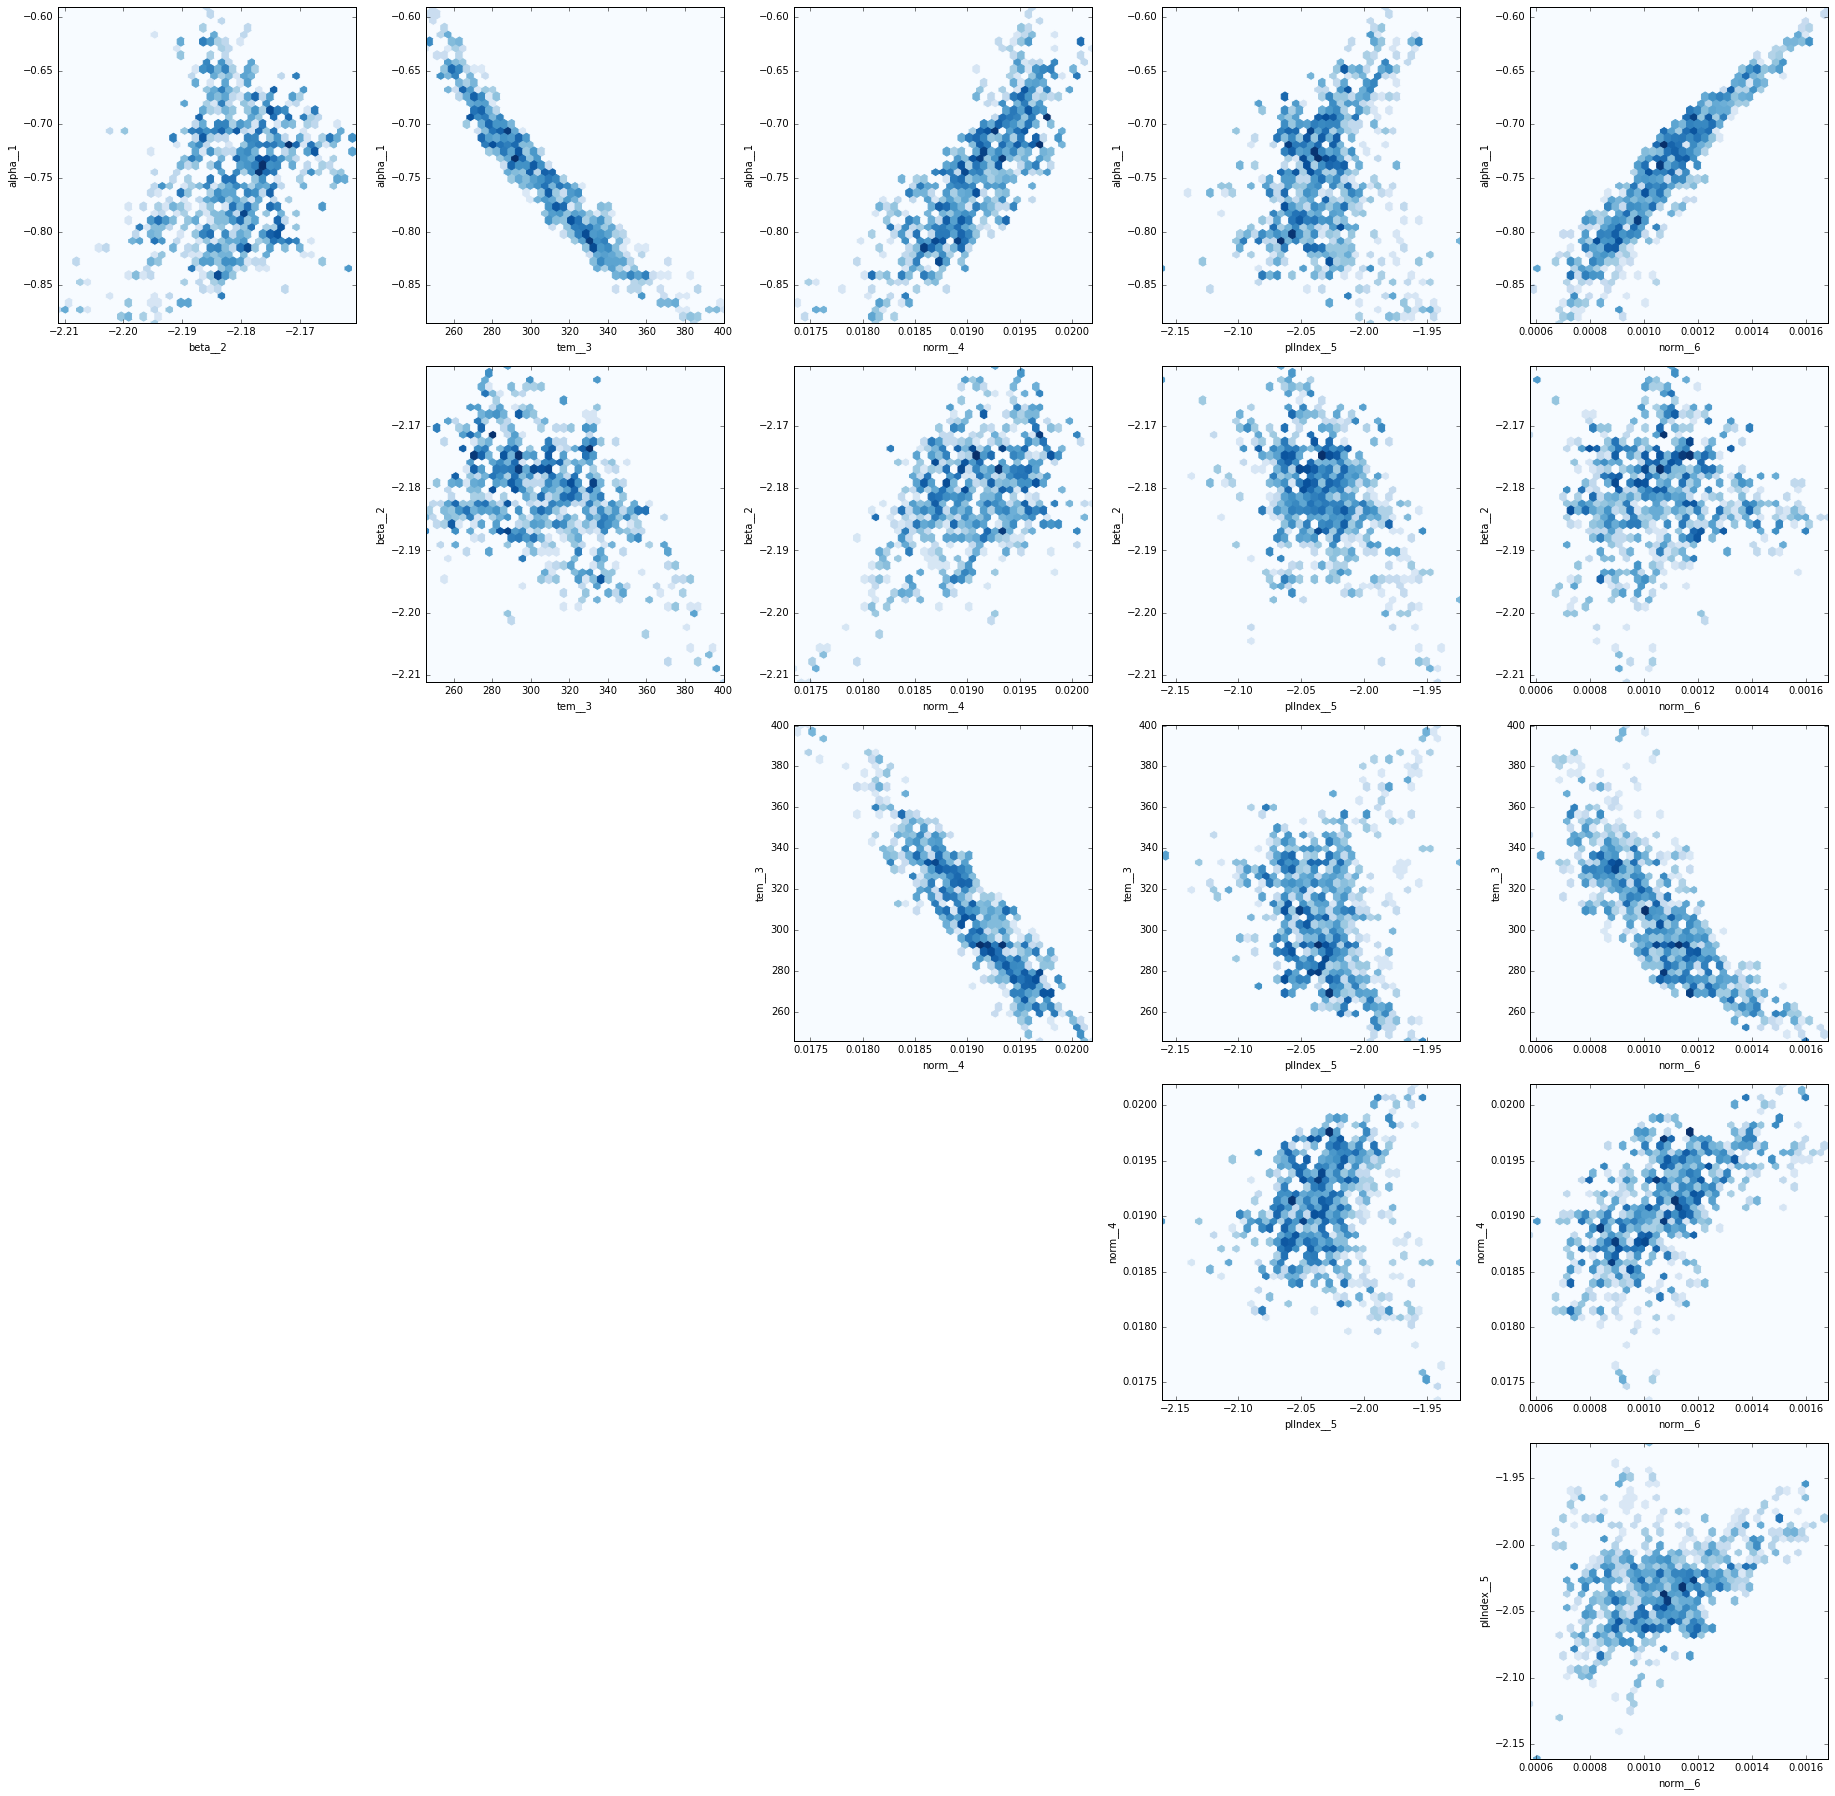

In [37]:
fig = plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):  # i in the parameter on the y-axis of each row.
    for j in range(i): # j is the next parameter in array that will be on the x-axis.
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(data, i, j, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel(parnames[j])
plt.tight_layout()

fig.savefig(pp, format='pdf', dpi=250)

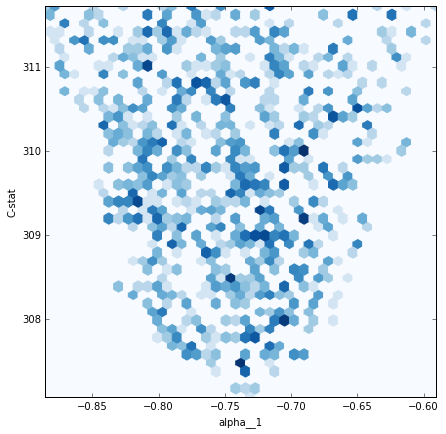

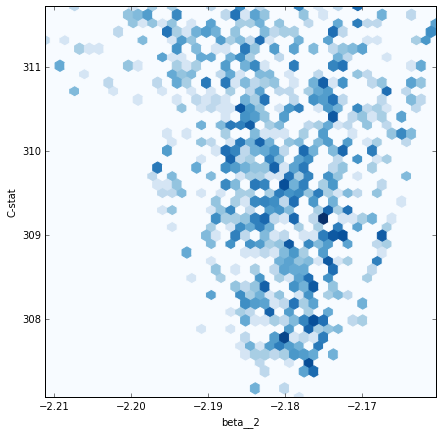

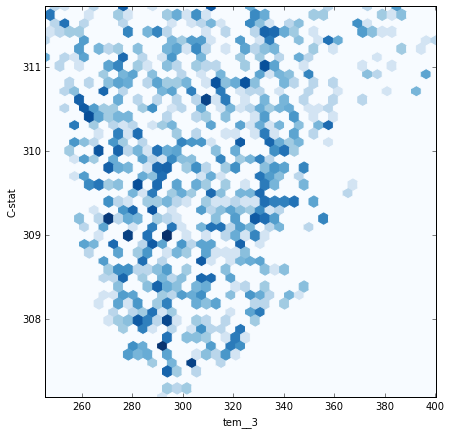

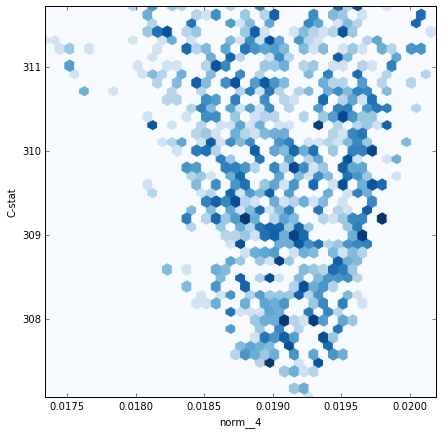

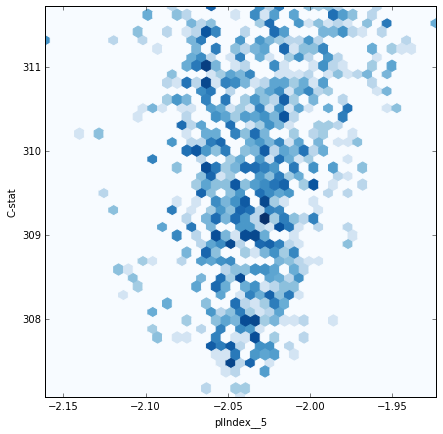

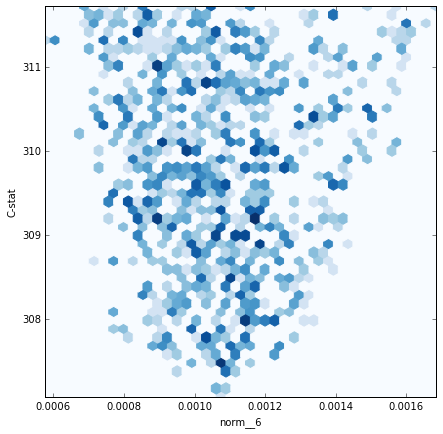

In [38]:
for i in range(npars):  
    fig = plt.figure(figsize=(7,7))
    parname = data.columns[i]
    plt.hexbin(data[parname], data["FIT_STATISTIC"], bins='log', 
               gridsize=40, cmap = plt.cm.Blues)
    plt.xlabel("%s"%parname)
    plt.ylabel("C-stat")
    fig.savefig(PDF2, format='pdf', dpi=250)

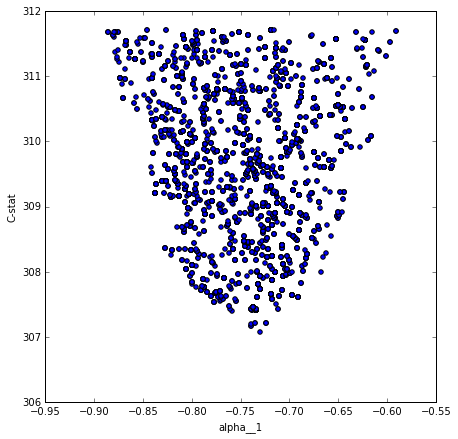

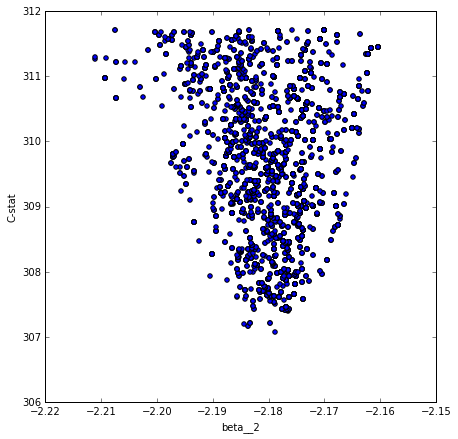

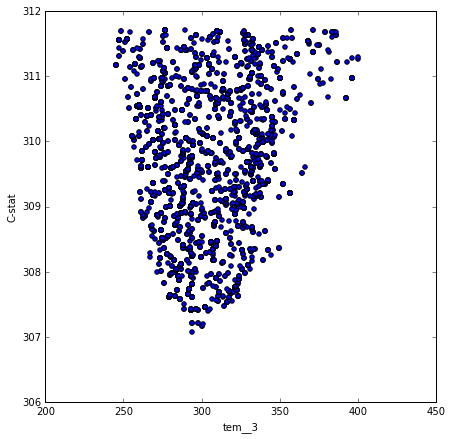

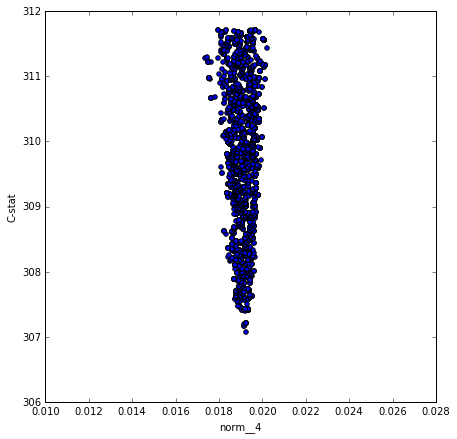

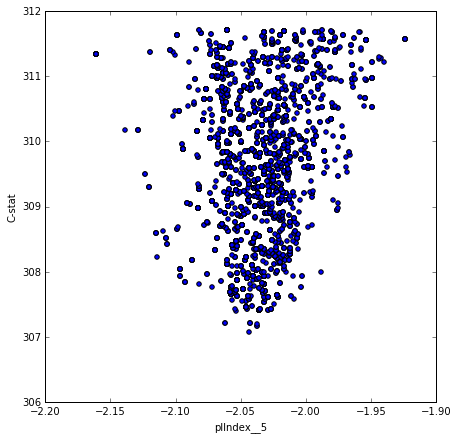

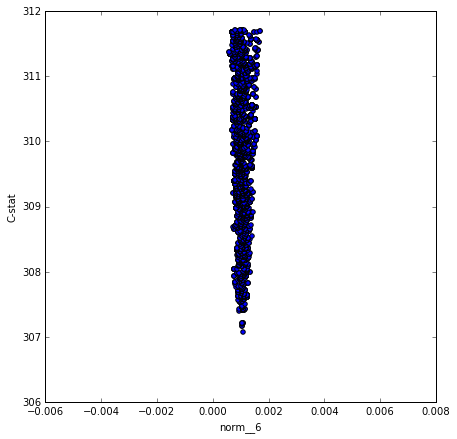

In [39]:
for i in range(npars):  
    fig = plt.figure(figsize=(7,7))
    parname = data.columns[i]
    plt.scatter(data[parname], data["FIT_STATISTIC"])#, bins='log', gridsize=40, cmap = plt.cm.Blues)
    plt.xlabel("%s"%parname)
    plt.ylabel("C-stat")
    #fig.savefig(PDF2, format='pdf', dpi=250)

# Chain 2

In [40]:
data = Chain2S

t = data["FIT_STATISTIC"]

bins = ML.bayesian_blocks(t, fitness='events', p0=0.001)

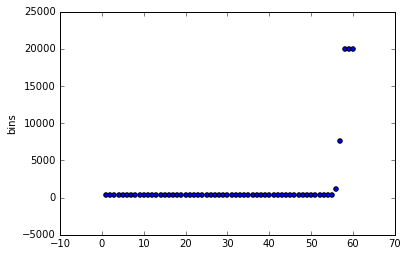

In [41]:
x = np.arange(1,len(bins)+1, 1)
y = bins
plt.scatter(x,y)
plt.ylabel("bins")

In [42]:
diff_bins = np.diff(bins)

In [43]:
max_diff_in_bins = np.max(diff_bins); max_diff_in_bins

12399.287378140787

In [44]:
diff_bins_ = list(diff_bins)
loc_of_max_diff_in_bins = diff_bins_.index(max_diff_in_bins)

In [45]:
loc_of_max_diff_in_bins, len(bins)

(56, 60)

In [46]:
idx = len(bins) - (loc_of_max_diff_in_bins ); idx

4

In [47]:
bins[:-idx]

array([  306.96087476,   307.6224097 ,   307.63188657,   308.55630738,
         308.55636745,   308.96186324,   308.96701688,   309.17481693,
         309.18122154,   309.22918643,   309.24130781,   309.37979382,
         309.63084467,   309.7101726 ,   309.72972945,   309.78452726,
         309.78791549,   309.97445489,   309.97723185,   310.07920406,
         310.09409345,   310.52199217,   310.58213236,   310.86778581,
         310.91264622,   310.91287354,   311.08733605,   311.10792473,
         311.2737478 ,   311.33953509,   311.34080524,   311.71192395,
         311.75012281,   313.91564314,   314.21434447,   314.27380485,
         314.41693218,   314.42282902,   315.07383934,   315.09963308,
         315.45344967,   315.49208129,   316.74347698,   316.98132081,
         317.00494979,   317.60214905,   317.62611164,   318.03168269,
         318.15475001,   318.866494  ,   319.87541012,   321.29604403,
         321.33514574,   323.03059236,   360.71297168,  1105.11600892])

In [48]:
np.mean(bins)

1429.4647008738334

In [49]:
stat_cutoff = np.mean(bins[:-idx]); stat_cutoff

327.68535208680385

### Cut all data with C-stat values less than the value above.

In [86]:
data = data[data.FIT_STATISTIC < stat_cutoff]

In [87]:
npars = len(data.columns) - 1  # number of parameters for model. Last column is C-stat values.
parnames = data.columns[0:-1] # parameter names for model.

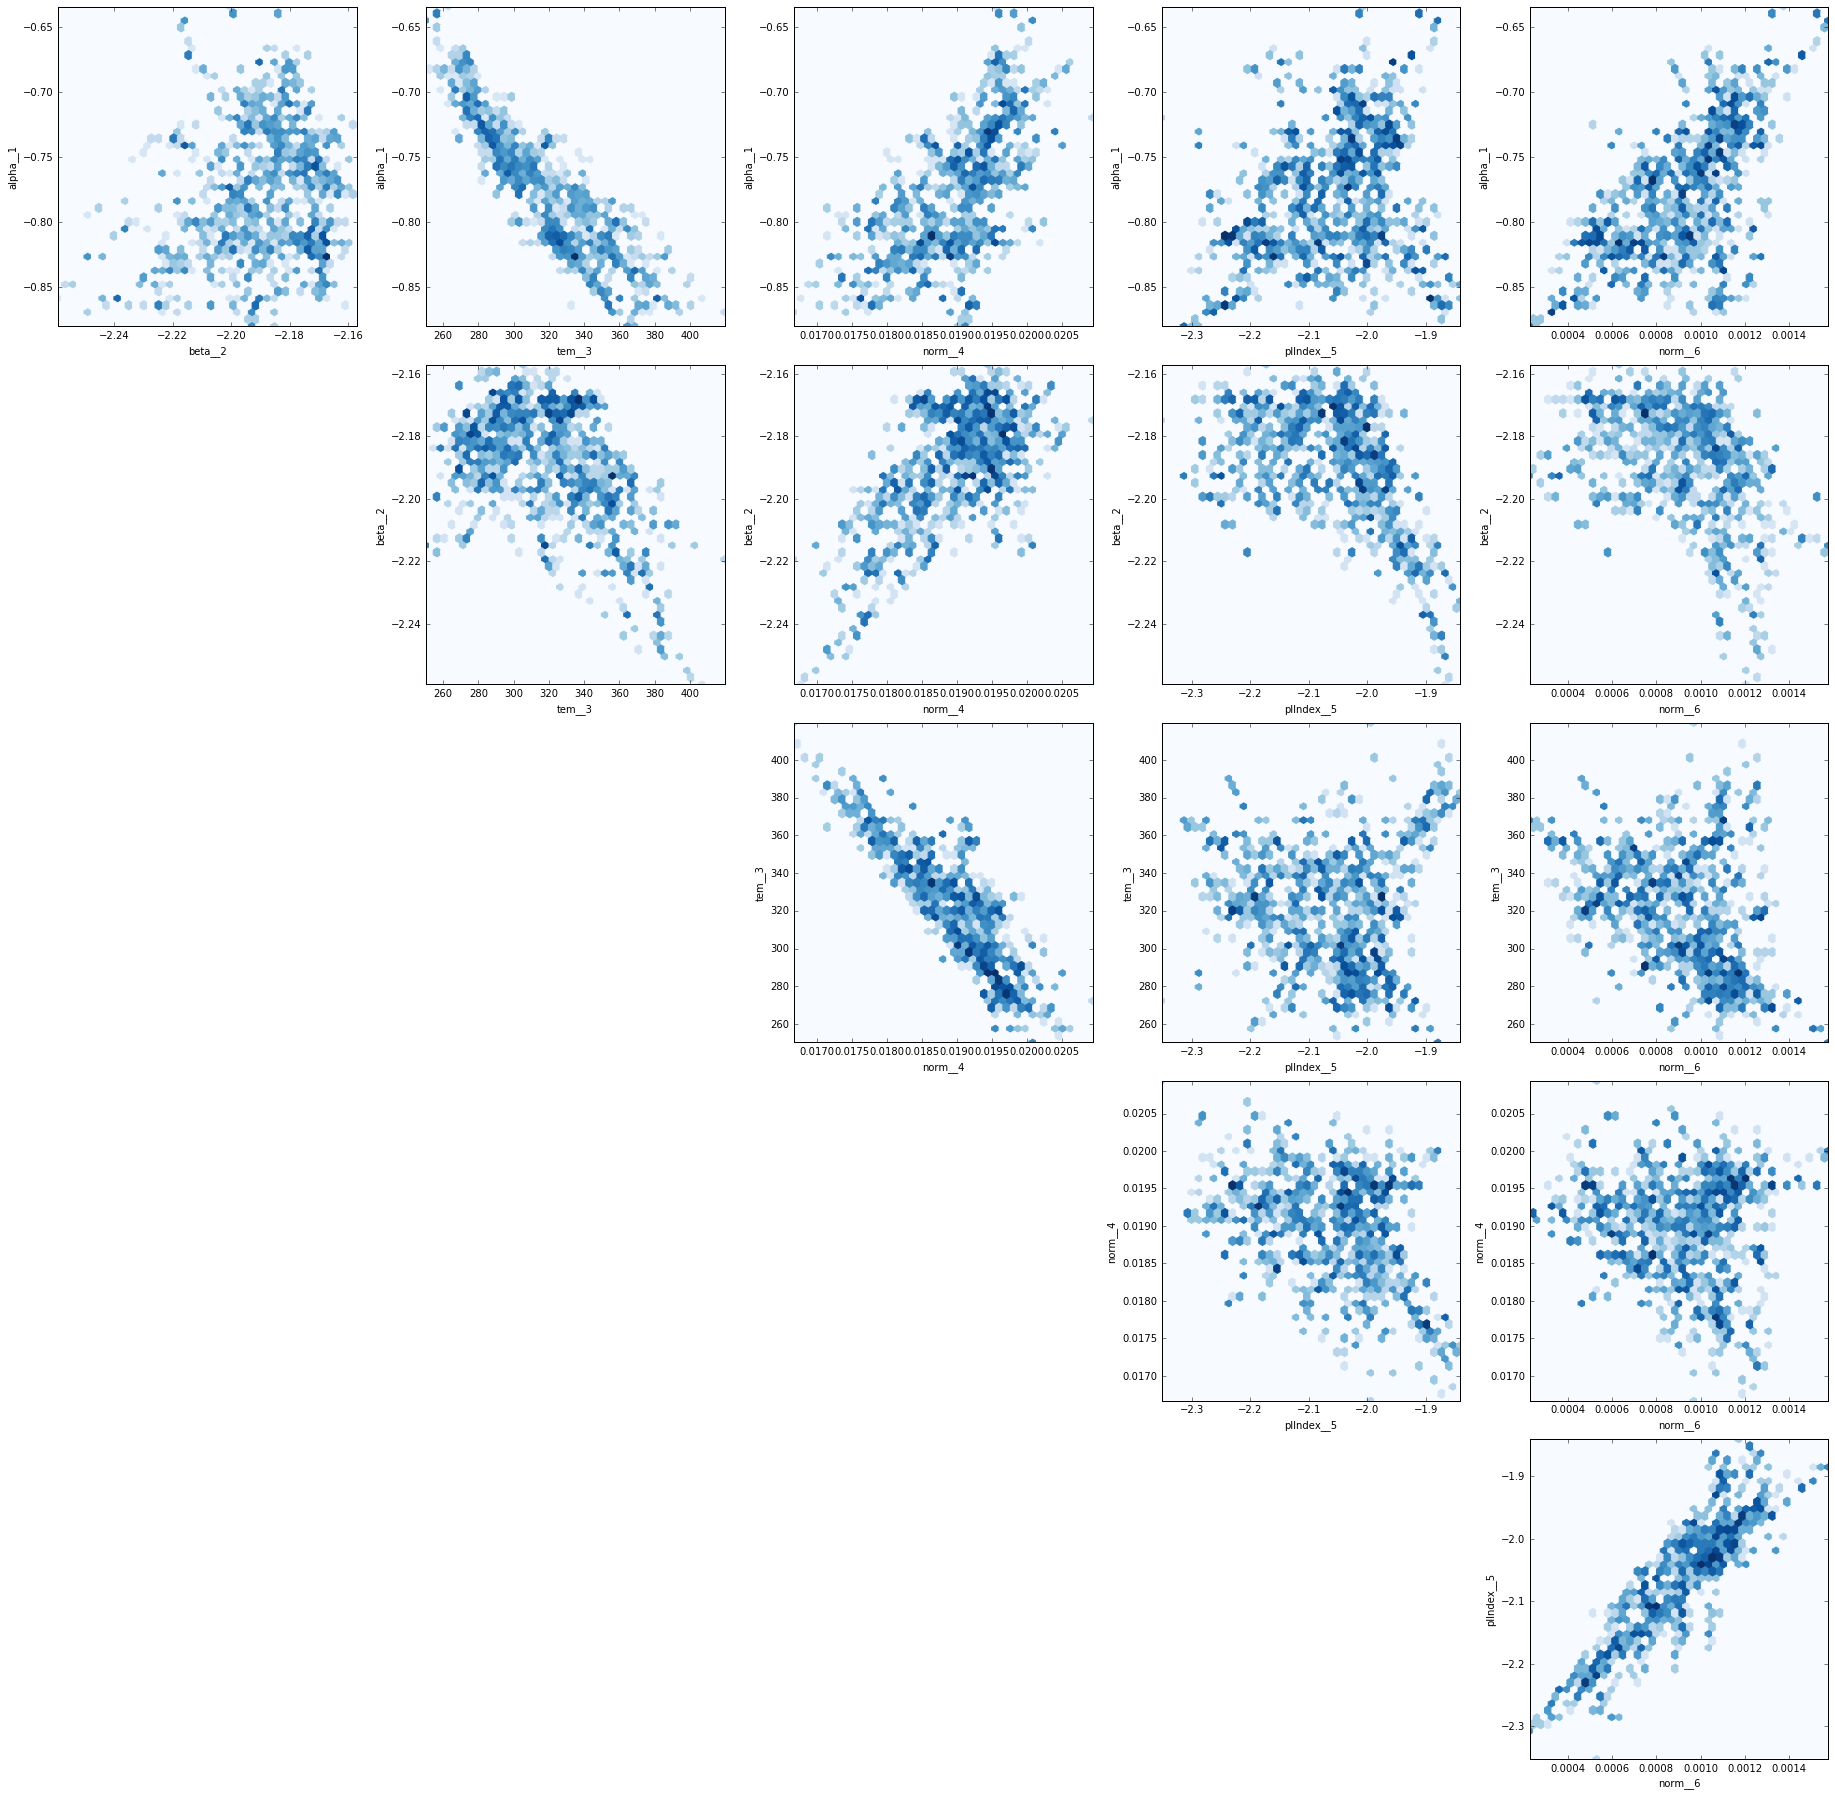

In [88]:
fig = plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):  # i in the parameter on the y-axis of each row.
    for j in range(i): # j is the next parameter in array that will be on the x-axis.
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(data, i, j, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel(parnames[j])
plt.tight_layout()
fig.savefig(pp, format='pdf', dpi=250)

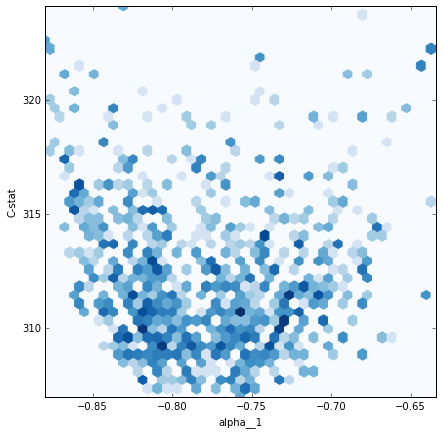

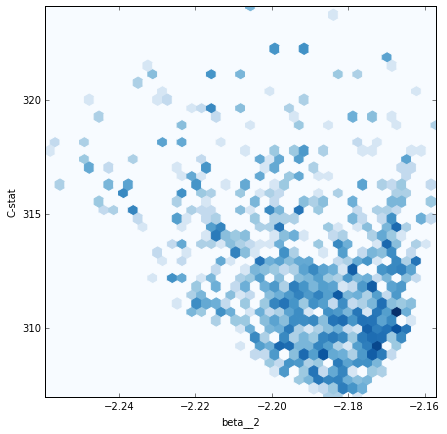

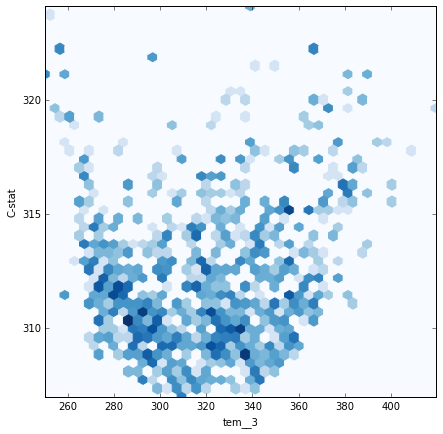

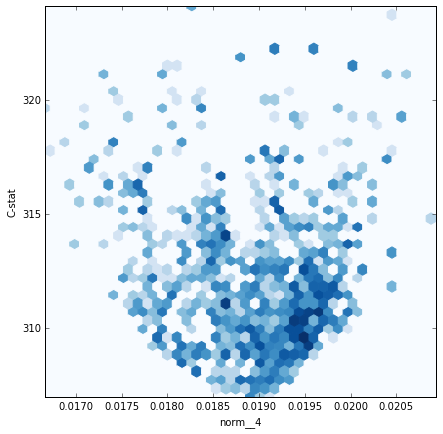

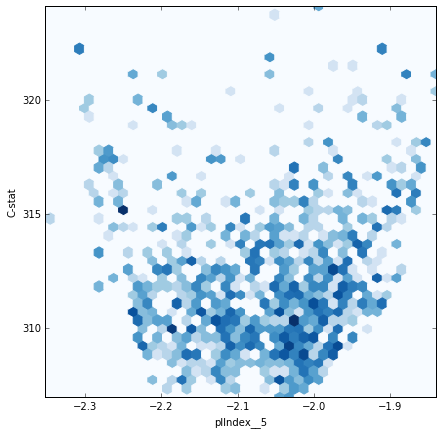

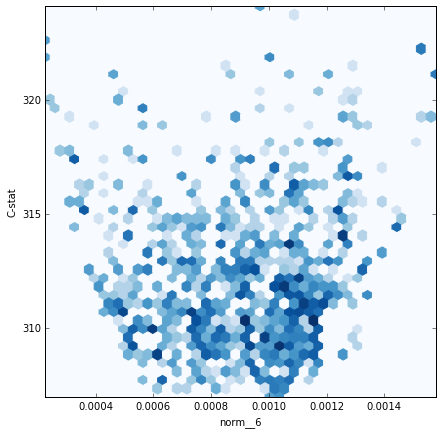

In [89]:
for i in range(npars):  
    fig = plt.figure(figsize=(7,7))
    parname = data.columns[i]
    plt.hexbin(data[parname], data["FIT_STATISTIC"], bins='log', 
               gridsize=40, cmap = plt.cm.Blues)
    plt.xlabel("%s"%parname)
    plt.ylabel("C-stat")
    fig.savefig(PDF2, format='pdf', dpi=250)

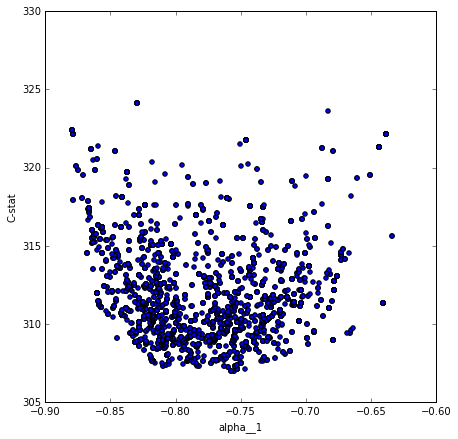

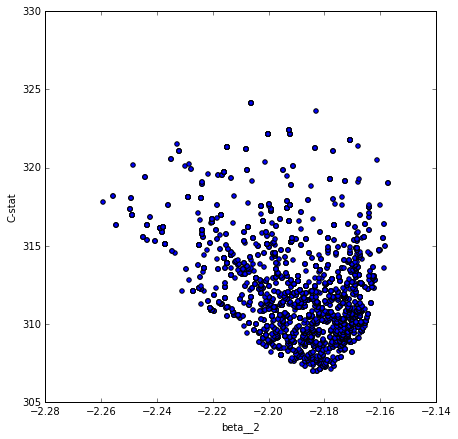

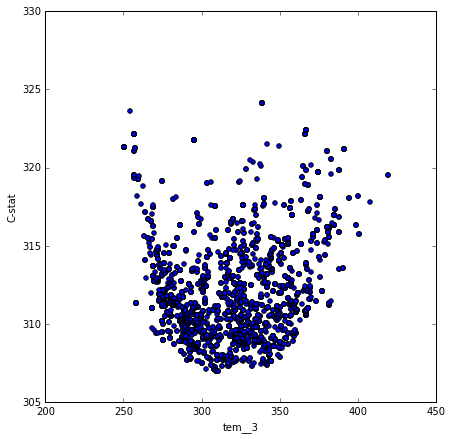

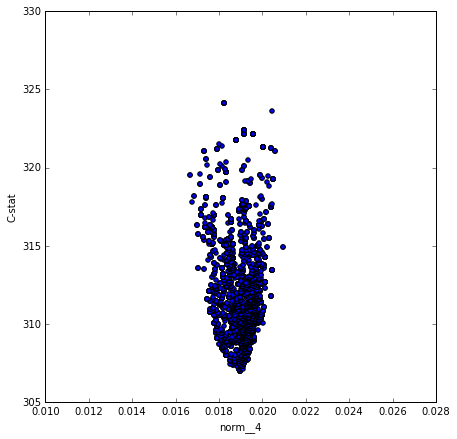

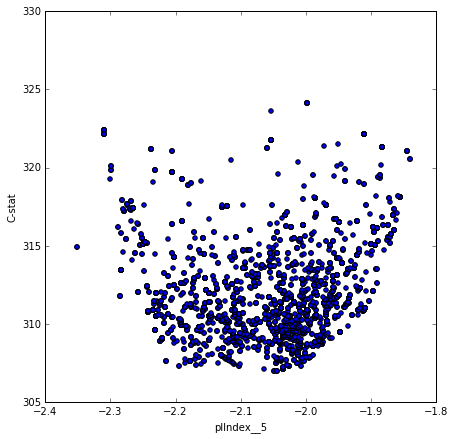

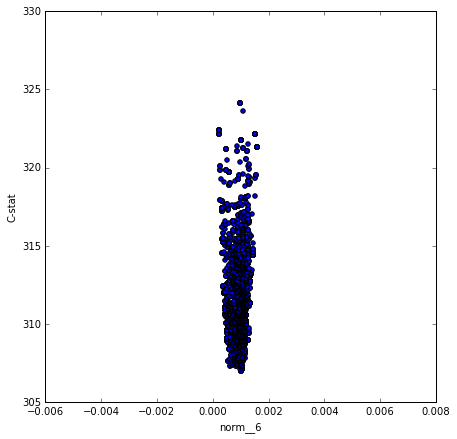

In [90]:
for i in range(npars):  
    fig = plt.figure(figsize=(7,7))
    parname = data.columns[i]
    plt.scatter(data[parname], data["FIT_STATISTIC"])#, bins='log', gridsize=40, cmap = plt.cm.Blues)
    plt.xlabel("%s"%parname)
    plt.ylabel("C-stat")
    #fig.savefig(PDF2, format='pdf', dpi=250)

# Chain 3

In [91]:
data = Chain3S

t = data["FIT_STATISTIC"]

bins = ML.bayesian_blocks(t, fitness='events', p0=0.001)

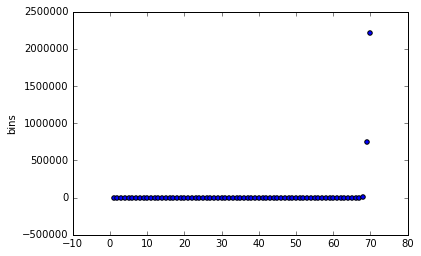

In [92]:
x = np.arange(1,len(bins)+1, 1)
y = bins
plt.scatter(x,y)
plt.ylabel("bins")

In [93]:
diff_bins = np.diff(bins)

In [94]:
max_diff_in_bins = np.max(diff_bins); max_diff_in_bins

1457520.3813134669

In [95]:
diff_bins_ = list(diff_bins)
loc_of_max_diff_in_bins = diff_bins_.index(max_diff_in_bins)

In [96]:
loc_of_max_diff_in_bins, len(bins)

(68, 70)

In [97]:
idx = len(bins) - (loc_of_max_diff_in_bins ); idx

2

In [98]:
bins[:-idx]

array([  306.81978787,   307.48785113,   307.87488989,   307.90759901,
         308.08817636,   308.16693301,   308.16905852,   308.78822098,
         308.86105058,   308.86321158,   309.0872124 ,   309.21332277,
         309.3046984 ,   309.3124446 ,   309.45063642,   309.55466498,
         309.5559729 ,   309.71944797,   309.72634435,   309.90932029,
         309.92075472,   310.27287668,   310.29106456,   310.66037634,
         310.66113391,   311.07488885,   311.08251684,   311.11682423,
         311.12564139,   311.33528071,   311.49813896,   311.54616356,
         311.97700267,   311.98406588,   312.83621356,   312.8375873 ,
         312.85104828,   312.85951222,   313.1159907 ,   313.1439107 ,
         313.30125086,   313.4682322 ,   313.52479713,   313.61510806,
         314.17355573,   314.17494401,   314.67847515,   315.4031884 ,
         315.41318913,   315.81069196,   315.86170561,   316.03717377,
         316.0616216 ,   316.17631069,   316.55598357,   317.08194283,
      

In [99]:
np.mean(bins)

42684.848187395437

In [100]:
stat_cutoff = np.mean(bins[:-idx]); stat_cutoff

344.94509638249917

### Cut all data with C-stat values less than the value above.

In [101]:
data = data[data.FIT_STATISTIC < stat_cutoff]

In [102]:
npars = len(data.columns) - 1  # number of parameters for model. Last column is C-stat values.
parnames = data.columns[0:-1] # parameter names for model.

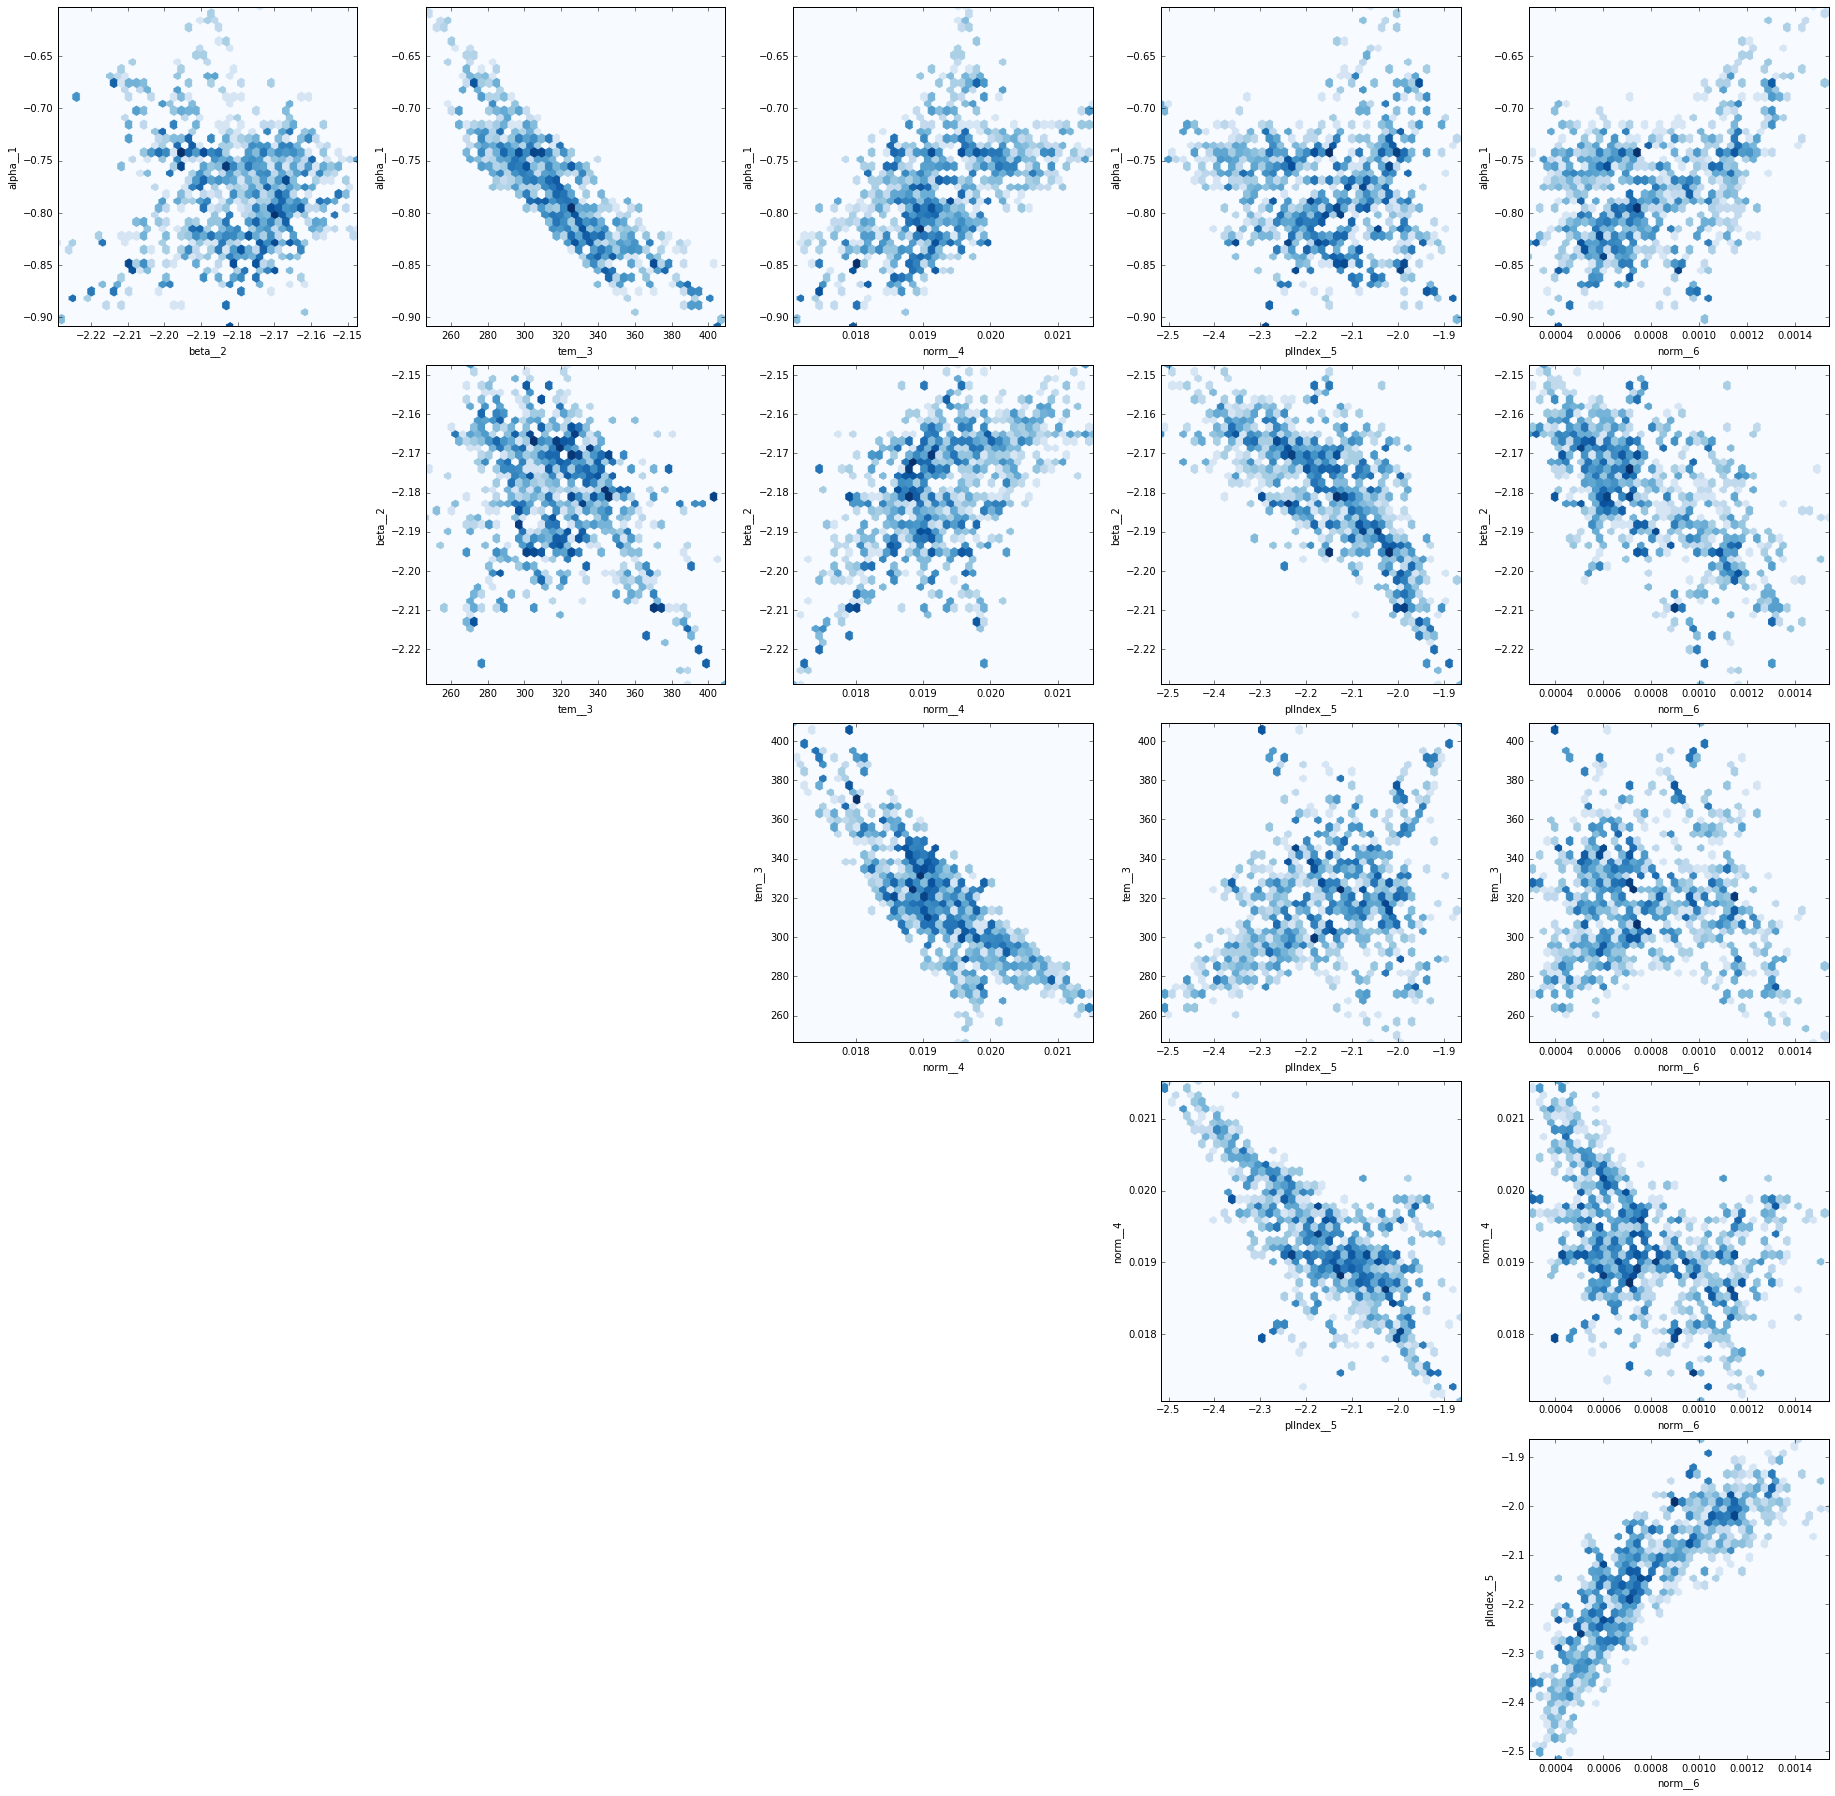

In [103]:
fig = plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):  # i in the parameter on the y-axis of each row.
    for j in range(i): # j is the next parameter in array that will be on the x-axis.
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(data, i, j, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel(parnames[j])
plt.tight_layout()
fig.savefig(pp, format='pdf', dpi=250)

In [104]:
#PDF3 = PdfPages('ChainPlots3.pdf') # PDF to store plots.

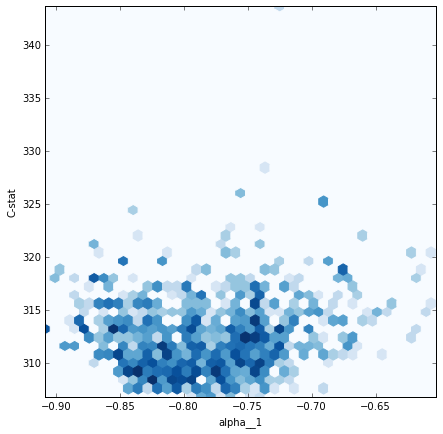

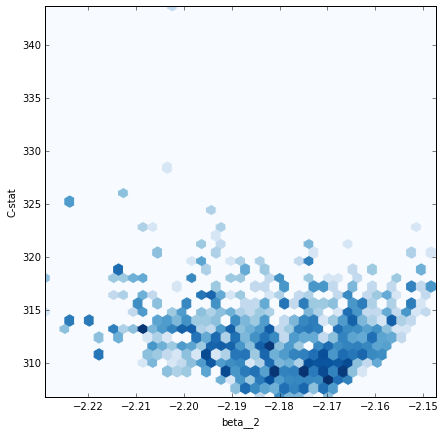

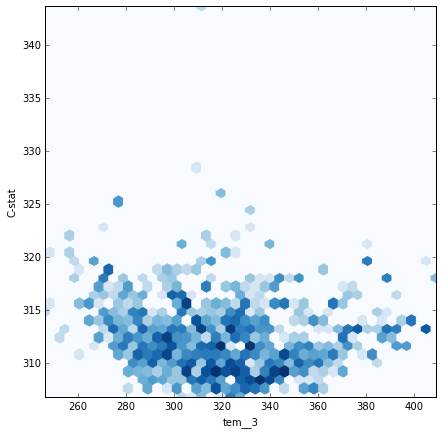

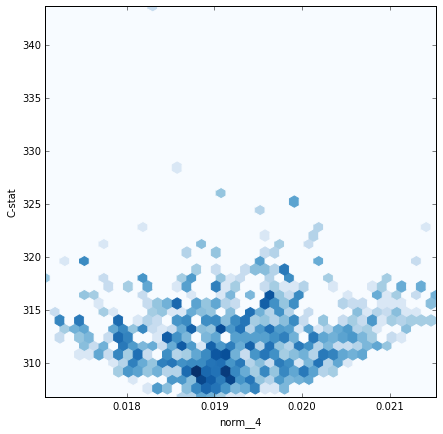

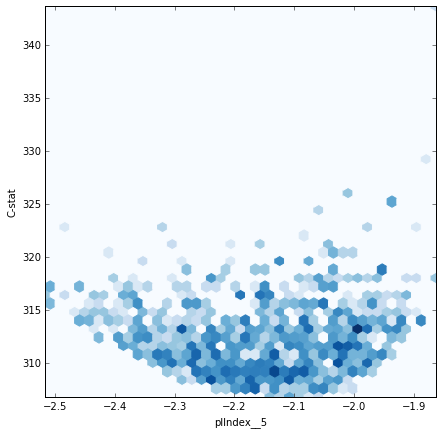

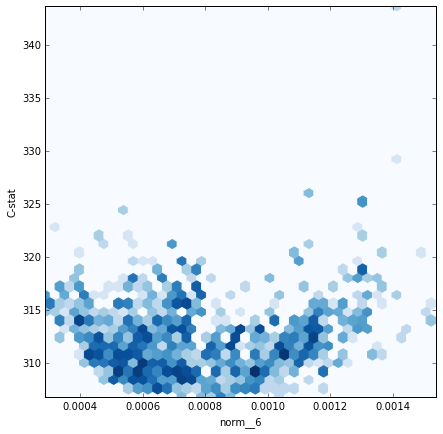

In [105]:
for i in range(npars):  
    fig = plt.figure(figsize=(7,7))
    parname = data.columns[i]
    plt.hexbin(data[parname], data["FIT_STATISTIC"], bins='log', 
               gridsize=40, cmap = plt.cm.Blues)
    plt.xlabel("%s"%parname)
    plt.ylabel("C-stat")
    fig.savefig(PDF2, format='pdf', dpi=250)

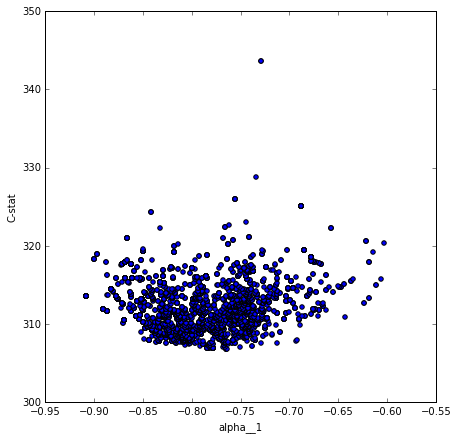

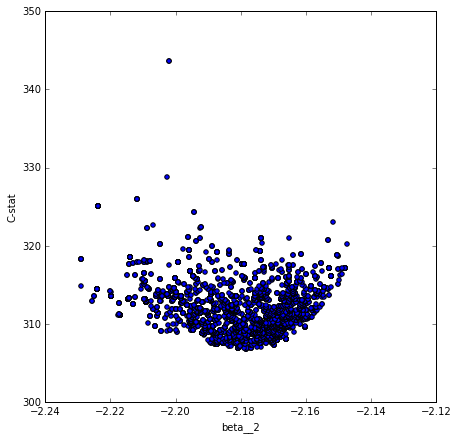

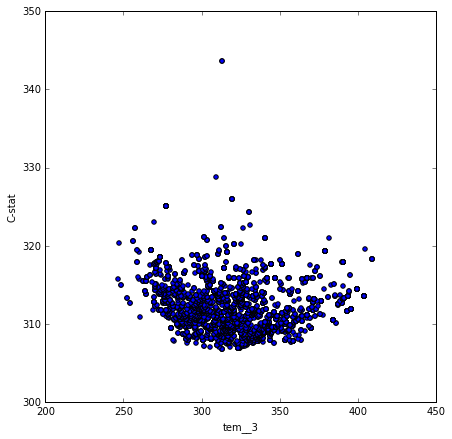

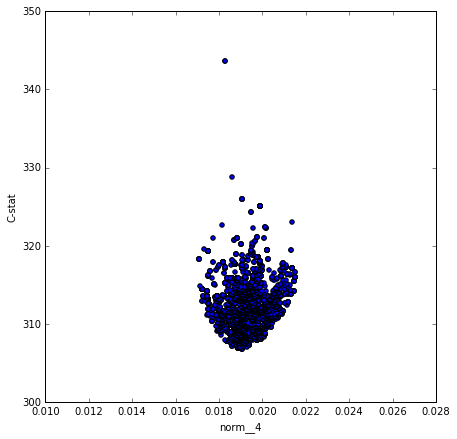

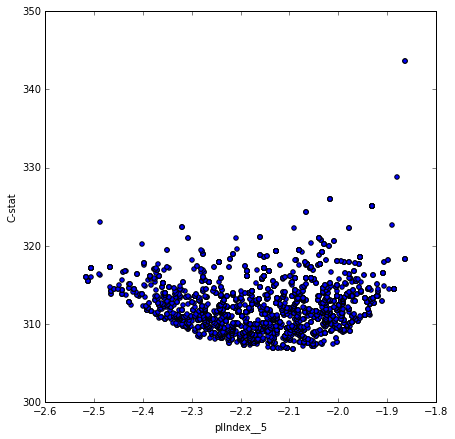

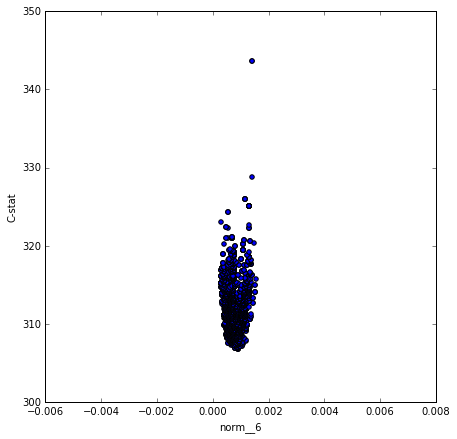

In [106]:
for i in range(npars):  
    fig = plt.figure(figsize=(7,7))
    parname = data.columns[i]
    plt.scatter(data[parname], data["FIT_STATISTIC"])#, bins='log', gridsize=40, cmap = plt.cm.Blues)
    plt.xlabel("%s"%parname)
    plt.ylabel("C-stat")
    #fig.savefig(PDF2, format='pdf', dpi=250)

In [107]:
PDF2.close()

# pandas.tools.plotting.scatter_matrix

### Instead of using from pandas.tools.plotting import scatter_matrix, I have copied their code and added the ability to add a scatter point to the plots.  The red dot is the best C-stat value in the chain data set.  

In [241]:
from panda_plotting_kz import scatter_matrix

In [242]:
#from pandas.tools.plotting import scatter_matrix

### Since matplotlib plots the last data point last and on top of the rest, we actually want the last value plotted to be the lowest C-stat value.  We will now sort the array by C-stat in decending order.

In [110]:
data2 = data.sort_values(by="FIT_STATISTIC", ascending=False)

In [245]:
plt_kwds = {'c':data2.FIT_STATISTIC,
            'cmap':plt.cm.jet,
            'marker':'.',
            'lw':0,
            'edgecolors':None}

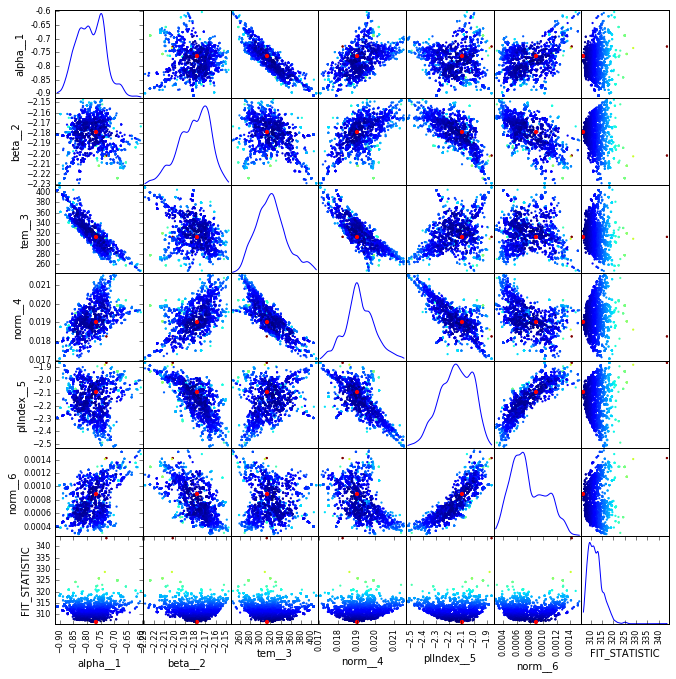

In [246]:
scatter_matrix(data2, alpha=None, figsize=(11, 11), diagonal='kde', **plt_kwds);

In [247]:
hist_kwds = {'bins': 20}
plt_kwds = {'c':data2.FIT_STATISTIC,
            'cmap':plt.cm.jet,
            'marker':'.',
            'lw':0,
            'edgecolors':None}

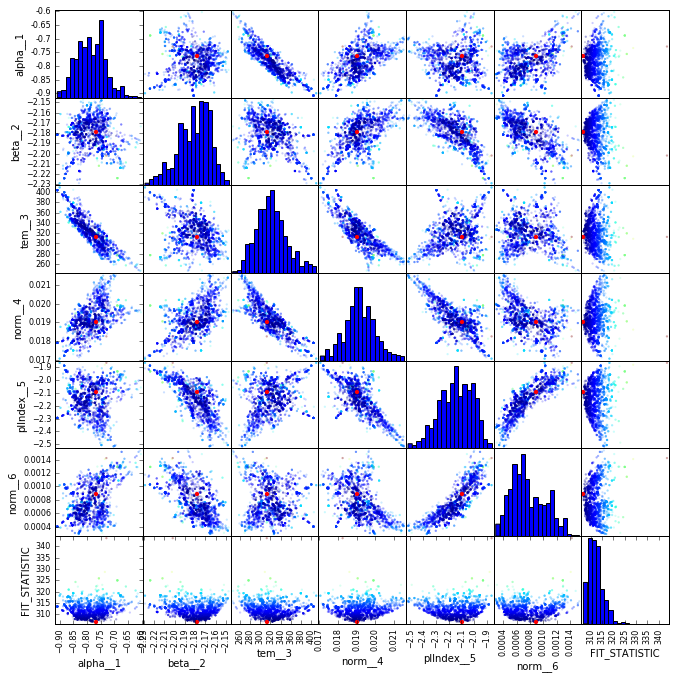

In [249]:
scatter_matrix(data2, alpha=0.2, figsize=(11, 11), diagonal='hist', 
               hist_kwds=hist_kwds, **plt_kwds);